In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm

data = pd.read_csv('forestfires.csv')

X = data[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']]
y = data['area']

lm = sm.OLS(y, X)
model = lm.fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   area   R-squared (uncentered):                   0.055
Model:                            OLS   Adj. R-squared (uncentered):              0.040
Method:                 Least Squares   F-statistic:                              3.674
Date:                Thu, 01 Aug 2024   Prob (F-statistic):                    0.000352
Time:                        16:21:45   Log-Likelihood:                         -2876.3
No. Observations:                 517   AIC:                                      5769.
Df Residuals:                     509   BIC:                                      5803.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Train MSE:  2031.9869535380335
Train RMSE:  45.077565967319416
Train R^2:  0.022921271691111578
Test MSE:  11780.009395280173
Test RMSE:  108.53575169168992
Test R^2:  0.0006576927283136191
Katsayılar:  [-0.05989457  0.11069229 -0.01327068 -0.36047746  0.49182879 -0.13551323
  0.87968939 -1.75093896]
Intercept:  7.866606364289497


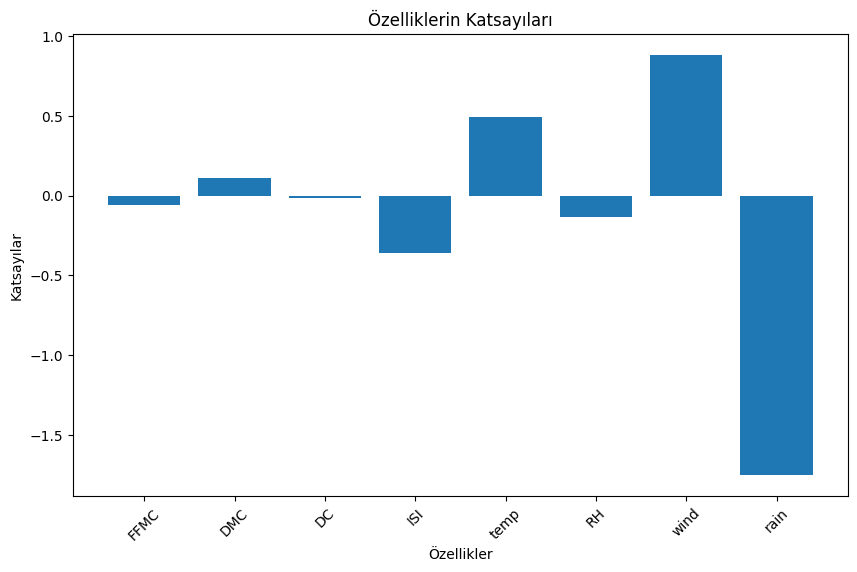

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)

# train hatası
print("Train MSE: ", mean_squared_error(y_train, model.predict(X_train)))
print("Train RMSE: ", np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
print("Train R^2: ", r2_score(y_train, model.predict(X_train)))

# test hatası
print("Test MSE: ", mean_squared_error(y_test, model.predict(X_test)))
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
print("Test R^2: ", r2_score(y_test, model.predict(X_test)))

print("Katsayılar: ", model.coef_)
print("Intercept: ", model.intercept_)

plt.figure(figsize=(10, 6))
plt.bar(X.columns, model.coef_)
plt.xlabel('Özellikler')
plt.ylabel('Katsayılar')
plt.title('Özelliklerin Katsayıları')
plt.xticks(rotation=45)
plt.show()